<img src="https://www.semana.com/resizer/tDsVab0UPSTECCzbK9xSu6d63Ts=/1280x720/smart/filters:format(jpg):quality(80)/cloudfront-us-east-1.images.arcpublishing.com/semana/HWBTGHUHVRBRZEGVTODRRB74WU.jpg" style="margin-left: 10%; float: center;  border:5px solid ; width:80%; height : 80%;">

##Importar librerias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

##Importar daset

In [ ]:
data = pd.read_excel('Data_Train.xlsx')

##Exploracion de datos


In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.shape

(10683, 11)

##Dimensiones

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
print('Data.describe')
data.describe(include= 'all').T

Data.describe


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#Limpieza de datos
##Verificar valores nulos

In [ ]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Airline,0,0.000000
Date_of_Journey,0,0.000000
Source,0,0.000000
Destination,0,0.000000
Route,1,0.009361
Dep_Time,0,0.000000
Arrival_Time,0,0.000000
Duration,0,0.000000
Total_Stops,1,0.009361
Additional_Info,0,0.000000


## Como solo 2 de los todos los datos no tienen información, Se toma la decisión es excluirlos del Dataset



In [ ]:
# Eliminamos los datos
data.dropna(inplace=True)

In [ ]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Airline,0,0.0
Date_of_Journey,0,0.0
Source,0,0.0
Destination,0,0.0
Route,0,0.0
Dep_Time,0,0.0
Arrival_Time,0,0.0
Duration,0,0.0
Total_Stops,0,0.0
Additional_Info,0,0.0


##Cambiar tipó de dato (Date_of_Journey)
 Podemos ver que Date_of_Journey(fecha del viaje) es un tipo de dato objeto, Por lo tanto, tenemos que convertir este tipo de datos en una marca de tiempo para poder utilizar esta columna correctamente para la predicción.


In [ ]:
# Creamos la funcion para parsear
def change_into_datetime(col):
         data[col]=pd.to_datetime(data[col])

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Cambiamos todos los datos
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [ ]:
# Verificamos
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
# Se agregran dos columnas al DateFrame
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

In [ ]:
# Se elimina la columna Date_of_Journey
data.drop('Date_of_Journey', axis=1, inplace=True)

In [ ]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-29 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-29 05:50:00,2024-03-29 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-03-29 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-03-29 18:05:00,2024-03-29 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-03-29 16:50:00,2024-03-29 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
# Definimos las funciones para la extracion de infomacion de [Dep_Time , Arrival_Time] y borrado,
def extract_hour(data,col):
    data[col+"_hour"]=data[col].dt.hour

def extract_min(data,col):
    data[col+"_minute"]=data[col].dt.minute

def drop_column(data,col):
    data.drop(col,axis=1,inplace=True)

In [ ]:
# Utlizamos las funciones y extraemos hora y minuto de partida
extract_hour(data,'Dep_Time')

extract_min(data,'Dep_Time')

#Borramos Dep_Time para ser remplazada por Dep_Time_hour y Dep_Time_hour
drop_column(data,'Dep_Time')

In [ ]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-29 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-03-29 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-03-29 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [ ]:
# Utilizamos las funciones anteriores para de igual manera extraer la hora y los minutos en Arrival_Time

extract_hour(data,'Arrival_Time')

extract_min(data,'Arrival_Time')


drop_column(data,'Arrival_Time')

In [ ]:
data.head()



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Separamos las horas y los minutos en Duration

In [ ]:
# Funcion para dar formato a la columna
duration=list(data['Duration']) # Crea un lista

for i in range(len(duration)): # Itera sobre todos los índices de la lista
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h '+ duration[i]

In [ ]:
data['Duration']=duration

In [ ]:
# Replazamos la culumna con la que tiene el formato
data['Duration']=duration

In [ ]:
# Funcion para extraer la hora
def hour(x):
    return x.split(' ')[0][0:-1]

In [ ]:
#Funcion para extraer los minutos
def min(x):
    return x.split(' ')[1][0:-1]

In [ ]:
# Agregamos las columnas nuevas al Dataframe
data['Duration_hours']=data['Duration'].apply(hour)
data['Duration_mins']=data['Duration'].apply(min)

In [ ]:
# eliminamos la columna Duration
data.drop('Duration',axis=1,inplace=True)

In [ ]:
# verificamos para un total de 15 columnas
data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [ ]:
# Convertimos los datos a tipo entero
data['Duration_hours']=data['Duration_hours'].astype(int)
data['Duration_mins']=data['Duration_mins'].astype(int)

In [ ]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [ ]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


## Extraer caracteristicas numericas y categorias

In [ ]:
# Verificamos que datos son numericos
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [ ]:
# verificamos que columnas no son de tipo numerico
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

##Tratamiento de datos categoricos       

Determinamos que tipo de datos categóricos siguen un orden o no.

In [ ]:
# Creamos un nuevo Dateframe con solo las columnas categoricas
categorical=data[cat_features]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


##Analicis Airline vs Price





In [ ]:
# Se verifica la frecuencia que aparece cada aerolinea
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

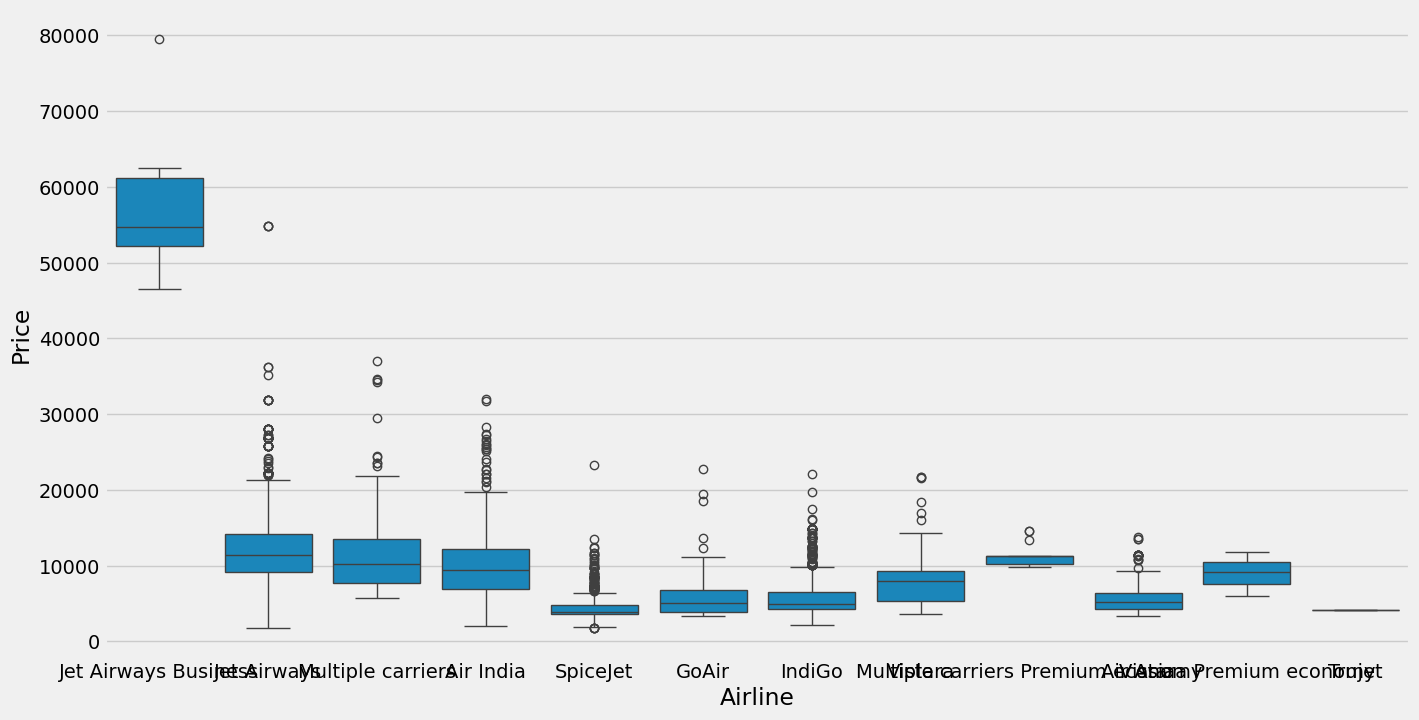

In [ ]:
# Grafica Airline vs Price Analysis
plt.figure(figsize=(15,8))
sns.boxplot(y='Price',x='Airline',data = data.sort_values('Price',ascending=False))

##Se puede aprecias que la aerolinea Jet Airways tiene un precio medio mayor a las demas aerolineas y posible relacion con Price.

### Se identifica que la columna Airline tiene categoria nominal

In [ ]:
# Convirtiendo la columna 'Airline' en variables dummy
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


## Analicis Source vs Price

In [ ]:
# Se verica los lugares de salida mas frecuentes
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Figure size 1500x800 with 0 Axes>

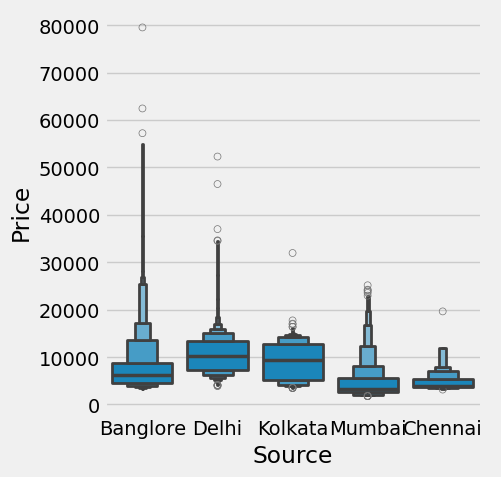

In [ ]:
# Grafica Source vs Price Analysis
plt.figure(figsize=(15,8))
sns.catplot(y='Price',x='Source',data = data.sort_values('Price',ascending=False),kind='boxen')

## Se identifica que la columna Source es tiene cagoria nominal

In [ ]:
# Convirtiendo la columna 'Source' en variables dummy
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
...,...,...,...,...
10678,False,False,True,False
10679,False,False,True,False
10680,False,False,False,False
10681,False,False,False,False


## Analicis Destination vs Price

In [ ]:
# Lugares de destino mas frecuentes
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Figure size 1500x800 with 0 Axes>

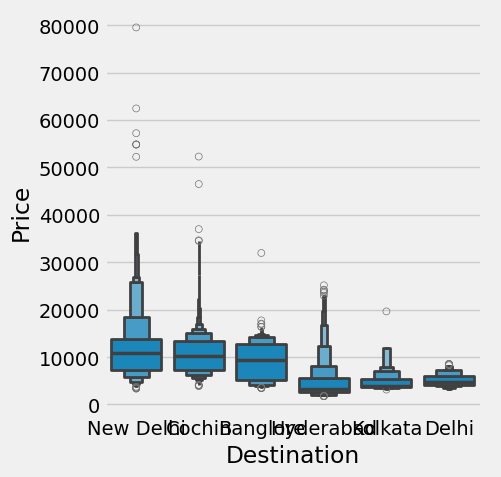

In [ ]:
# Grafica Destination vs Price
plt.figure(figsize=(15,8))
sns.catplot(y='Price',x='Destination',data = data.sort_values('Price',ascending=False),kind='boxen')

## Se clafica las columna Destination como nominal

In [ ]:
# Convirtiendo la columna 'Destination' en variables dummy

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


## Tratamiento columna Route

In [ ]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
# Se se crea y se divide en 5 columnas para su tratamiento
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
# Remplaza los valos NaN por None en los datos faltantes de las nuevas columnas
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [ ]:
# Analizamos cuantas categoria hay en cada columna del Dataframe Categorical
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



### Se puede apreciar que la columna Route tiene muchas categorias y decide utilizar LabelEncoder().

In [ ]:
# creamos una instancia
encoder=LabelEncoder()

In [ ]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [ ]:
# Se cambian los valores de los Routes por valores numericos
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [ ]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


## Casi el 80% de la columna Additional_Info no tiene información por lo que se toma la decisión de eliminar la columna Additional_Info y Route ya que se extrajo toda la información pertinente de esta última.


In [ ]:
# Se eliminan las columnas
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [ ]:
# Se verifican los valores mas frecuentes de Total_Stops
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# Verificamos los valores unicos de Total_Stops
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## Se identifica que la columna Total_Stops tiene categoria ordinal.


In [ ]:
# Se crea un diccionario mapeado con los valores de Total_Stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
# Aplicamos el mapeo a la columna Total_Stops
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [ ]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [ ]:
# Verificamos las columnas numericas del Dataframe original
data[num_features]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,1,3,11,30,14,10,2,40


## Realizamos la union entre categorical y el Dataframe original


In [ ]:
data = pd.concat([categorical,Airline,Source,Destination,data[num_features]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,False,...,True,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,True,...,False,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,False,...,False,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,False,...,False,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,False,...,True,13302,1,3,16,50,21,35,4,45


In [ ]:
# Eliminamos las columnas donde ya minamos toda la información útil

drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')

In [ ]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:
# Establecemos un numero de columnas para mostrar,
pd.set_option('display.max_columns',35)

In [ ]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [ ]:

data.shape

(10682, 38)

In [ ]:
data.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

#Tratamientos de valores atipicos    

 36 Puntos rechazados
Una puntuación z de 4 corresponde a una probabilidad de 0.01%


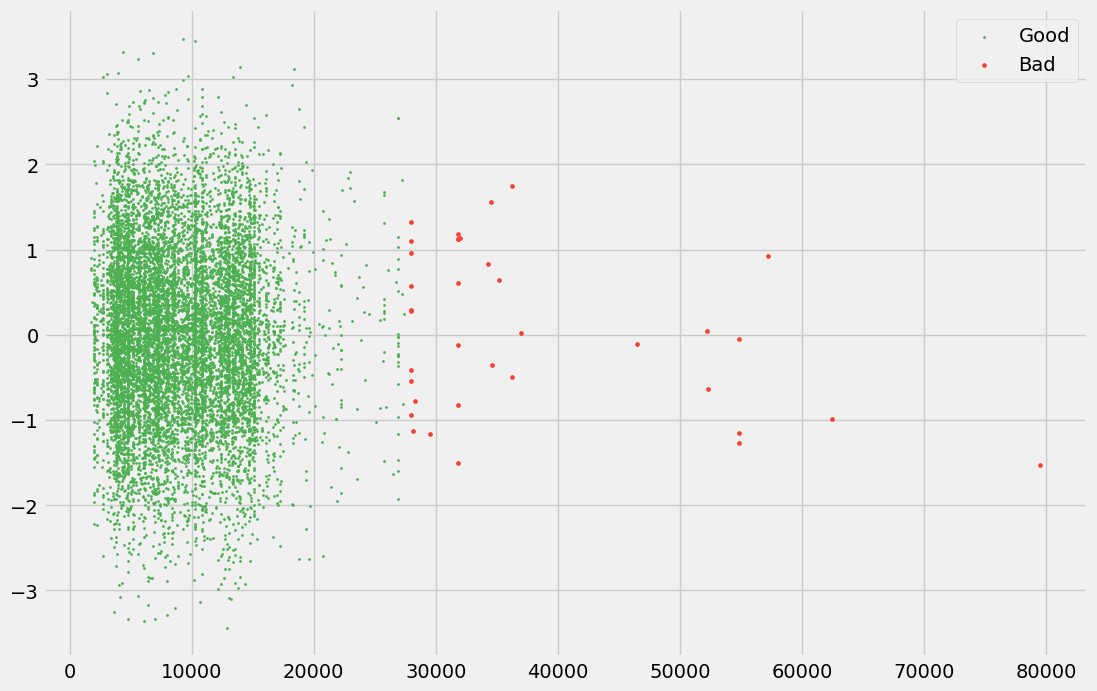

In [ ]:
plt.figure(figsize=(12,8))
mean, std = np.mean(data['Price']), np.std(data['Price']) # Obtenemos la media y desviación estándar
z_score = np.abs((data['Price'] - mean) / std) #  Calcula la puntuación z para cada precio
threshold = 4 # Se establece un umbral
good = z_score < threshold # Recoge las puntaciones menores a 4 (True)

print(f" {(~good).sum()} Puntos rechazados") # Suma y pinta con puntos los mayores a 4
from scipy.stats import norm
print(f"Una puntuación z de 4 corresponde a una probabilidad de {100 * 2 * norm.sf(threshold):0.2f}%") # Muestra la probabilidad de observar puntos más extremos que el umbral establecido
visual_scatter = np.random.normal(size=data['Price'].size) # Genera valores aleatorios de una distribución normal
plt.scatter(data['Price'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(data['Price'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

## Se dectetaron 36 datos atipicos, los cuales seran remplazados por la media la columna price


In [ ]:
# Se analiza y se establece cambiar cada precio mayor que 30000 por la media de la columna Price
data['Price']=np.where(data['Price']>=30000,data['Price'].median(),data['Price'])

<Axes: xlabel='Price', ylabel='Density'>

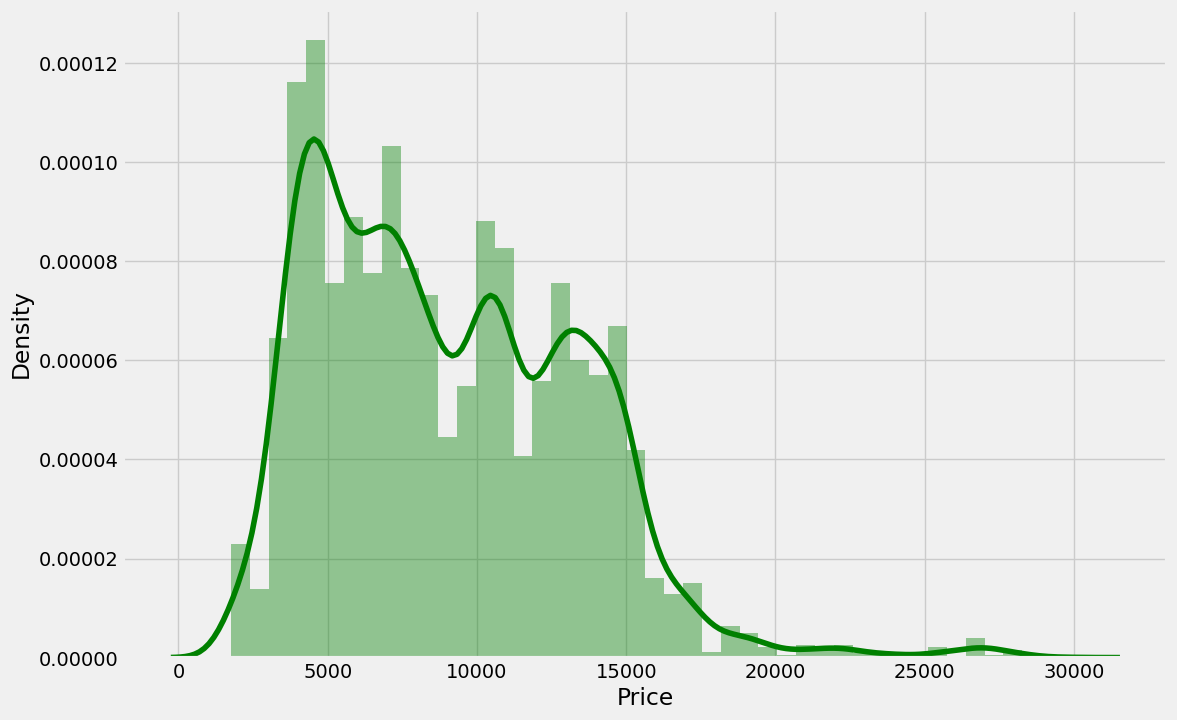

In [ ]:
# Comprobamos la distribucion de la columna price
plt.figure(figsize=(12,8))
sns.distplot(data['Price'] ,color= "g")

## Separamos los datos independientes de los datos dependientes

In [ ]:
# Se crea un Dataframe sin la columna Price y una variable con la columna Price
X=data.drop('Price',axis=1)
y=data['Price']
X.head()


,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1,3,16,50,21,35,4,45


In [ ]:
print(X)

       Total_Stops  Route_1  Route_2  Route_3  Route_4  Route_5  Air India  \
0                0        0       13       29       13        5      False   
1                2        2       25        1        3        5       True   
2                2        3       32        4        5        5      False   
3                1        2       34        3       13        5      False   
4                1        0       34        8       13        5      False   
...            ...      ...      ...      ...      ...      ...        ...   
10678            0        2        5       29       13        5      False   
10679            0        2        5       29       13        5       True   
10680            0        0       13       29       13        5      False   
10681            0        0       13       29       13        5      False   
10682            2        3       16        4        5        5       True   

       GoAir  IndiGo  Jet Airways  Jet Airways Business  Multip

## Limpieza de datos terminada

#Selección de característica

### Feature Selection
   *Descubrir la mejor característica que contribuirá y tendrá una buena relación con la variable objetivo.
    
### Por que aplicar Feature Selection?
   * Seleccionar características es importantes para deshacerse de la dimensionalidad, es decir, deshacerse de características duplicadas.

In [ ]:
# Aplicamos el modelo Lasso para buscar la caracteristica
feature_sel_model = SelectFromModel(Lasso(alpha=0.2, random_state=0)) # se establece el estado aleatorio(semilla)
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.2, random_state=0))

In [ ]:
# establece que caracteristicas son importantes
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Se guardan los nopmbres de las columnas del Dataframe X
cols=X.columns

In [ ]:
# Creamos una lista con las características seleccionadas
selected_feat = cols[(feature_sel_model.get_support())]

In [ ]:
selected_feat

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Kolkata', 'Mumbai', 'Hyderabad',
       'New Delhi', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [ ]:
# Creamos un Dataframe con las caracteristicas seleccionadas
x=X[selected_feat]



In [ ]:
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Kolkata,Kolkata,Mumbai,Hyderabad,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,1,3,16,50,21,35,4,45


# División de los datos de entrenamiento para datos de testeo

In [ ]:
#Division y parametros
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

In [ ]:
# Dimensiones de las las divisiones
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7477, 29)
X_test shape is  (3205, 29)
y_train shape is  (7477,)
y_test shape is  (3205,)


#Funcion del modelo

In [ ]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train) # Se ingresan los datos para el entrenamiento
    print('Puntaje de entrenamiento : {}'.format(model.score(X_train,y_train))) # Devuelve el coeficiente de determinación R²
    y_prediction=model.predict(X_test) # Coge el modelo entrenado para hacer predicciones
    print('Las prediciones son: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)# Calcula el R²
    print('Puntaje de R² : {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction)) # Calcula el Error Absoluto Medio
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction)) # Calcula el Error Absoluto Medio
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction))) # Calcula el Error Absoluto Medio
    sns.distplot(y_test-y_prediction) # Dibuja un histograma

# Implementación de modelos predictivos

##Random Forest Algorithm


Puntaje de entrenamiento : 0.9577331177477757
Las prediciones son: 
 [ 6542.14288016  8239.4135     11261.68768571 ... 13418.91942738
  7541.92141286 10583.07069194]


Puntaje de R² : 0.8173635084691777
MAE: 1168.39731664215
MSE: 3465736.1944510513
RMSE: 1861.6487838609762


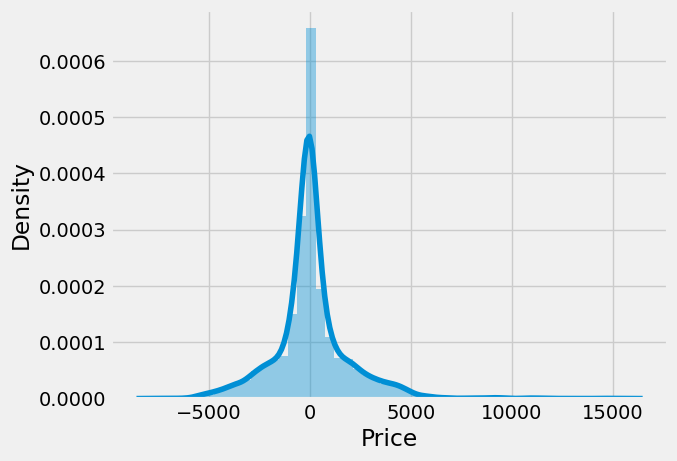

In [ ]:
predict(RandomForestRegressor(ccp_alpha=0.2,n_estimators=1000))

## Gradient Boosting


Puntaje de entrenamiento : 0.9725730984917962
Las prediciones son: 
 [11104.57159288  8613.99999081 12681.         ... 13941.
  7480.00000001 11147.99930698]


Puntaje de R² : 0.7217640303914534
MAE: 1344.3178647048744
MSE: 5279845.5685828
RMSE: 2297.7914545456033


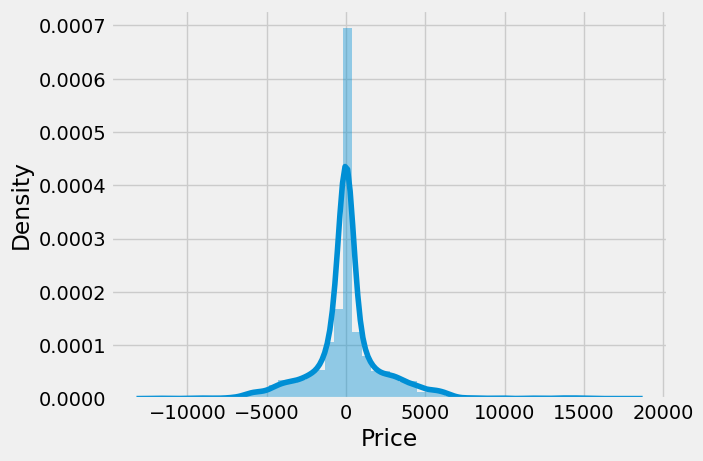

In [ ]:
predict(GradientBoostingRegressor(alpha=.3 , n_estimators=320,learning_rate=0.9, max_depth=30))

##Linear Regression Algorithm


Puntaje de entrenamiento : 0.6324626181220433
Las prediciones son: 
 [ 7169.81181976  9929.64154321 12487.49525068 ... 12634.83103217
  7860.00964082 12892.98923635]


Puntaje de R² : 0.6116033231702587
MAE: 1946.087892975687
MSE: 7370270.910324477
RMSE: 2714.824287191434


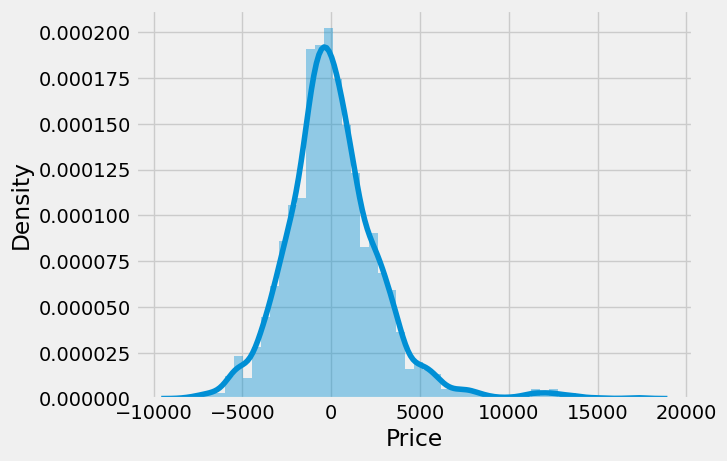

In [ ]:
predict(LinearRegression())

##MLPRegressor

Puntaje de entrenamiento : 0.5940864700065484
Las prediciones son: 
 [ 6572.91229052  9273.2555915  11936.96921492 ... 11729.46735064
  7184.95036736 12058.30952388]


Puntaje de R² : 0.5663187687670612
MAE: 2054.50973451992
MSE: 8229597.093877793
RMSE: 2868.727434574047


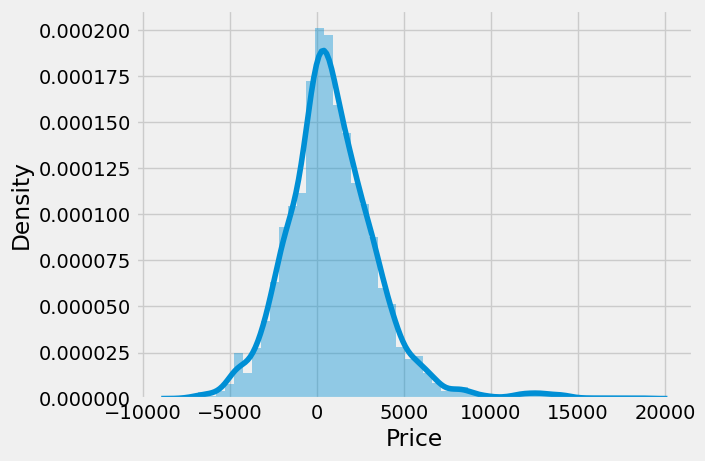

In [ ]:
predict(MLPRegressor( activation='identity' , solver='adam',
    alpha=0.00000005,
    batch_size=100,
    learning_rate='adaptive',
    learning_rate_init=0.5))

##Lasso Algorithm

Puntaje de entrenamiento : 0.632370841679654
Las prediciones son: 
 [ 7166.4586067   9922.47140454 12482.88922209 ... 12627.88492468
  7851.07914306 12906.08809161]


Puntaje de R² : 0.6113911426672098
MAE: 1946.128437126686
MSE: 7374297.277908577
RMSE: 2715.565738093736


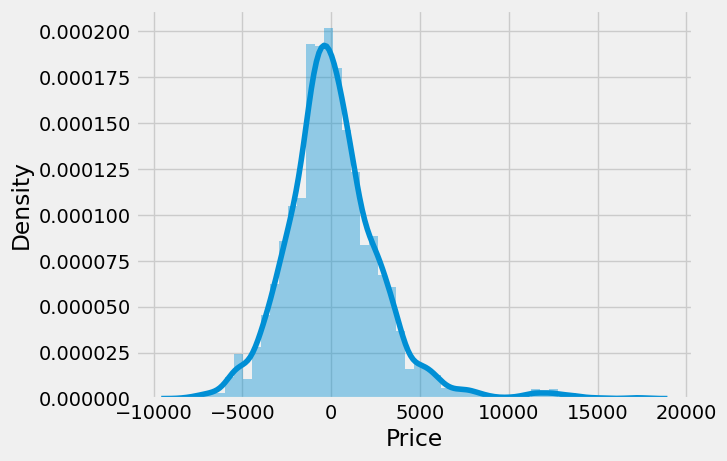

In [ ]:
predict(Lasso(max_iter=100000,alpha=.5,selection='random'))

## Ridge Algorithm

Puntaje de entrenamiento : 0.6312910275428733
Las prediciones son: 
 [ 7163.2822965   9904.67421255 12446.72695892 ... 12610.70798103
  7829.80646049 12918.377695  ]


Puntaje de R² : 0.6098832974776653
MAE: 1951.8978008047493
MSE: 7402910.363964005
RMSE: 2720.828984696393


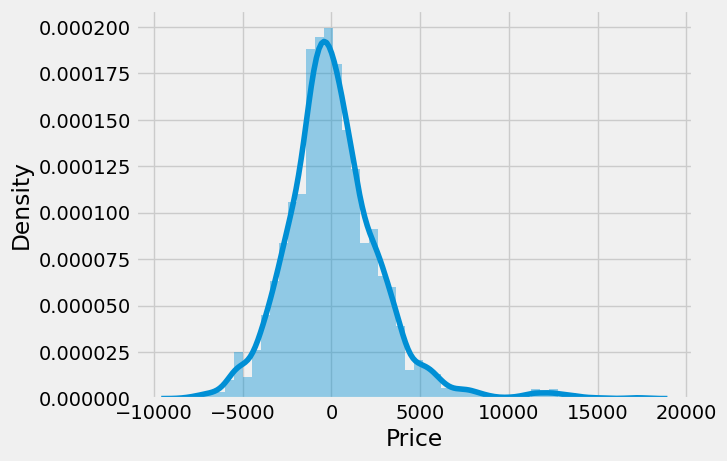

In [ ]:
predict(Ridge(solver='saga',alpha=.9 ,  max_iter=320))

## K-Neighbors Algorithm

Puntaje de entrenamiento : 0.9725148826771444
Las prediciones son: 
 [ 6391.4628978   8863.36301474 12681.         ... 13941.
  7480.         10179.50374633]


Puntaje de R² : 0.5748541272783034
MAE: 1902.0286654221231
MSE: 8067628.909551191
RMSE: 2840.3571799249457


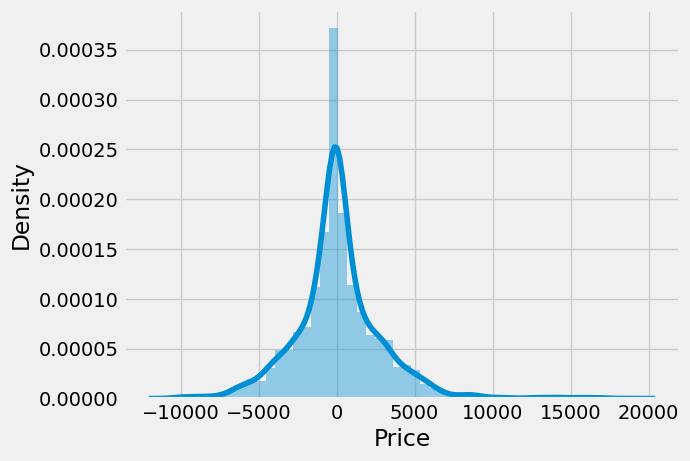

In [ ]:
predict(KNeighborsRegressor(n_neighbors=3,

    weights='distance',
    algorithm='ball_tree',
    leaf_size=40,
    p=4,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,))